# Clustering

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

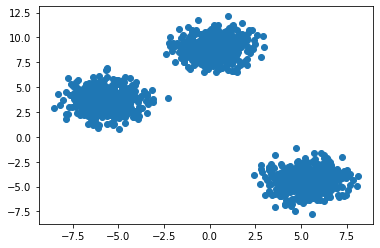

In [2]:
n_samples = 1500
random_state = 23
X, y = make_blobs(n_samples= n_samples, random_state = random_state)
plt.scatter(X[:, 0], X[:, 1])

In [3]:
print(X.shape, y.shape)

(1500, 2) (1500,)


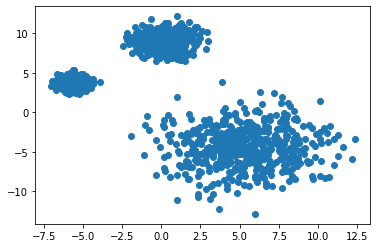

In [4]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
plt.scatter(X_varied[:, 0], X_varied[:, 1])
X = X_varied
y = y_varied

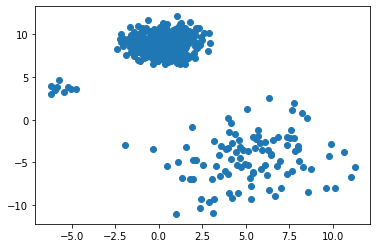

In [5]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
plt.scatter(X_filtered[:, 0], X_filtered[:, 1])
X = X_filtered
y = y_varied

## KMeans Algorithm

In [20]:
from sklearn.cluster import KMeans

kmeans_result = KMeans(n_clusters = 3, init='k-means++').fit(X)

In [21]:
kmeans_result.cluster_centers_, kmeans_result.labels_, kmeans_result.inertia_, kmeans_result.n_iter_

(array([[ 0.25144148,  8.90066736],
        [ 5.40203407, -4.58145683],
        [-5.30992445,  3.0820959 ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  

In [22]:
kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 1]

(array([ 0.25144148,  5.40203407, -5.30992445]),
 array([ 8.90066736, -4.58145683,  3.0820959 ]))

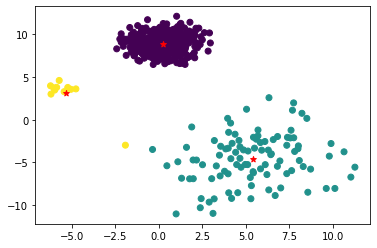

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans_result.labels_)
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 1], marker='*', c='r')

### Determine the Number of clusters: Elbow Method

In [11]:
kmeansCost = []
numClusters = range(1, 10)
for k in numClusters:
    result = KMeans(n_clusters = k, init='k-means++').fit(X)
    kmeansCost.append(result.inertia_)

C:\Users\dhiraj.suvarna\Anaconda3\envs\autoencoderenv\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Text(0, 0.5, 'Cost of Clustering')

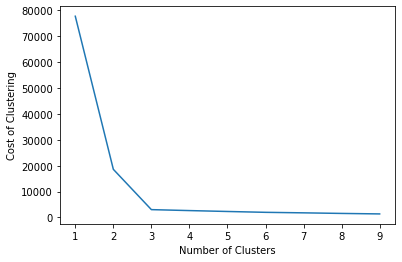

In [12]:
plt.plot(numClusters, kmeansCost)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost of Clustering")

### Evaluate the quality of Clustering: Sillutote Method 

## K-Medoids

In [13]:
# install pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, metric='cosine', method='pam', init='k-medoids++').fit(X)

In [14]:
kmedoids.cluster_centers_, kmedoids.medoid_indices_, kmedoids.labels_, kmedoids.inertia_ 

(array([[ 0.24140001,  8.41360306],
        [ 9.61273005, -8.04352777],
        [-5.86692705,  3.79823109]]),
 array([137, 590, 605]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

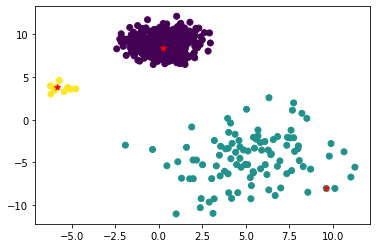

In [15]:
plt.scatter(X[:,0], X[:, 1], c=kmedoids.labels_)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], marker='*', c='r')

## Rough

In [50]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

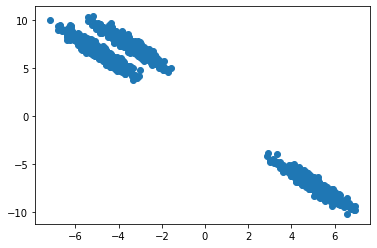

In [13]:
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])

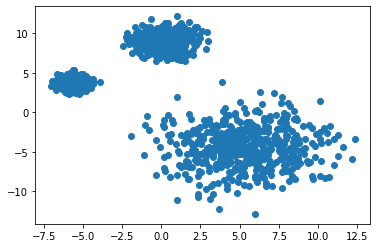

In [16]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
plt.scatter(X_varied[:, 0], X_varied[:, 1])

In [28]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
plt.scatter(X_filtered[:, 0], X_filtered[:, 1])

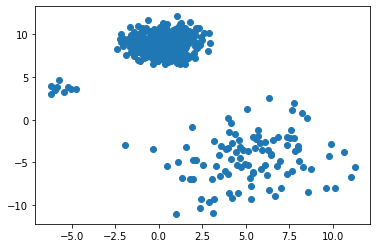

In [29]:
plt.scatter(X_filtered[:, 0], X_filtered[:, 1])